<a href="https://colab.research.google.com/github/RIZWANA9297/Rizwana-/blob/main/dlproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import IPython
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

from nltk.corpus import stopwords
!pip install transformers

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/overview-of-recordings.csv")

In [ ]:
df.head(n=2)

audio_clipping  audio_clipping:confidence background_noise_audible  \
0     no_clipping                     1.0000              light_noise   
1  light_clipping                     0.6803                 no_noise   

   background_noise_audible:confidence  overall_quality_of_the_audio  \
0                               1.0000                          3.33   
1                               0.6803                          3.33   

     quiet_speaker  quiet_speaker:confidence  speaker_id  \
0  audible_speaker                       1.0    43453425   
1  audible_speaker                       1.0    43719934   

                                       file_download  \
0  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
1  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                       file_name  \
0  1249120_43453425_58166571.wav   
1  1249120_43719934_43347848.wav   

                                              phrase            prompt  \
0                    When I remember her I feel down    Emotional pain   
1  When I carry heavy things I feel like breaking...  Hair falling out   

   writer_id  
0   21665495  
1   44088126

In [ ]:
df['audio_clipping'].unique()

array(['no_clipping', 'light_clipping'], dtype=object)

In [ ]:
df['audio_clipping:confidence'].describe()

count    6661.000000
mean        0.984625
std         0.070909
min         0.337800
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: audio_clipping:confidence, dtype: float64

In [ ]:
df['audio_clipping:confidence'].unique()

array([1.    , 0.6803, 0.6978, 0.6609, 0.6986, 0.6438, 0.6503, 0.6555,
       0.6575, 0.3378, 0.6757, 0.6622, 0.6486, 0.6824, 0.6623, 0.6624,
       0.6815, 0.6627, 0.6631, 0.7017, 0.6813, 0.6667, 0.6599, 0.6701,
       0.6596, 0.6644, 0.6724, 0.3523, 0.6874, 0.3506, 0.6556, 0.6759,
       0.6695, 0.6475, 0.6577, 0.651 , 0.6867, 0.6871, 0.6908, 0.6944,
       0.6984, 0.6406, 0.6918, 0.6607, 0.6861, 0.6959, 0.6769, 0.6528,
       0.668 , 0.662 , 0.3494, 0.6553, 0.6842, 0.692 , 0.6554, 0.6412,
       0.6458, 0.6446, 0.6776, 0.672 , 0.6849, 0.6761, 0.6567, 0.6645,
       0.6689, 0.6467, 0.6625, 0.6711, 0.671 , 0.6533, 0.6774, 0.6822,
       0.6957, 0.6889, 0.6648, 0.6579, 0.634 , 0.686 , 0.678 , 0.6445,
       0.653 , 0.6834, 0.64  , 0.6679, 0.6621, 0.6661, 0.6422, 0.6926,
       0.7067, 0.6777, 0.6432, 0.6414, 0.6729, 0.6566, 0.635 , 0.6853,
       0.6727, 0.68  , 0.6601, 0.7007, 0.6531, 0.649 , 0.6739, 0.6847,
       0.6789, 0.7117, 0.6515, 0.3472, 0.6419, 0.6656, 0.6725, 0.6835,
      

In [ ]:
df[df['audio_clipping:confidence'] == 0.653]

audio_clipping  audio_clipping:confidence background_noise_audible  \
303     no_clipping                      0.653              light_noise   
436     no_clipping                      0.653              light_noise   
6583    no_clipping                      0.653                 no_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
303                                   1.0                          3.00   
436                                   1.0                          3.00   
6583                                  1.0                          4.67   

        quiet_speaker  quiet_speaker:confidence  speaker_id  \
303   audible_speaker                       1.0    38548574   
436   audible_speaker                       1.0    43788827   
6583  audible_speaker                       1.0    44140394   

                                          file_download  \
303   https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
436   https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6583  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                          file_name  \
303   1249120_38548574_35678770.wav   
436   1249120_43788827_47510918.wav   
6583  1249120_44140394_85460947.wav   

                                                 phrase        prompt  \
303     i can't move my leg, there is pain in the joint    Joint pain   
436   I never had any acne problem until my last pre...          Acne   
6583                 When i eat i feel my stomach hurts  Stomach ache   

      writer_id  
303    44124309  
436    44130352  
6583   44118742

In [ ]:
import os
import IPython.display

# Assuming 'test' is a directory containing audio files,
# list all files within it and select the first audio file
audio_files = [f for f in os.listdir('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test') if f.endswith(('.wav', '.mp3'))]  # Adjust file extensions as needed
if audio_files:
    audio_file_path = os.path.join('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test', audio_files[0])
    IPython.display.Audio(audio_file_path)  # Display the first audio file found
else:
    print("No audio files found in the directory.")

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_15629457.wav')

In [ ]:
df[df['audio_clipping:confidence'] == df['audio_clipping:confidence'].min()]

audio_clipping  audio_clipping:confidence background_noise_audible  \
63  light_clipping                     0.3378              light_noise   

    background_noise_audible:confidence  overall_quality_of_the_audio  \
63                               0.6622                           3.0   

      quiet_speaker  quiet_speaker:confidence  speaker_id  \
63  audible_speaker                    0.6622    39675900   

                                        file_download  \
63  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                        file_name  \
63  1249120_39675900_82352673.wav   

                                               phrase         prompt  \
63  I feel pain in my shoulders when I write on th...  Shoulder pain   

    writer_id  
63   40632132

In [ ]:
df['phrase'][63]

'I feel pain in my shoulders when I write on the keyboard.'

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_19948105.wav')

In [ ]:
df['background_noise_audible'].unique()

array(['light_noise', 'no_noise'], dtype=object)

In [ ]:
df['background_noise_audible:confidence'].describe()

count    6661.000000
mean        0.854320
std         0.165967
min         0.336300
25%         0.671100
50%         1.000000
75%         1.000000
max         1.000000
Name: background_noise_audible:confidence, dtype: float64

In [ ]:
df[df['background_noise_audible:confidence'] == df['background_noise_audible:confidence'].min()]

audio_clipping  audio_clipping:confidence background_noise_audible  \
4603    no_clipping                        1.0                 no_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
4603                               0.3363                          3.67   

        quiet_speaker  quiet_speaker:confidence  speaker_id  \
4603  audible_speaker                       1.0    42783052   

                                          file_download  \
4603  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                          file_name          phrase prompt  writer_id  
4603  1249120_42783052_55934016.wav  i cant breathe  Cough   43767396

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_36985247.wav')

In [ ]:
df['background_noise_audible:confidence'].unique()

array([1.    , 0.6803, 0.6655, 0.6879, 0.3391, 0.3416, 0.6854, 0.6579,
       0.6479, 0.6892, 0.6438, 0.6443, 0.6456, 0.6944, 0.6467, 0.6475,
       0.6486, 0.6496, 0.6498, 0.65  , 0.6503, 0.6599, 0.6525, 0.6533,
       0.3451, 0.6552, 0.6556, 0.6557, 0.6563, 0.6575, 0.659 , 0.6597,
       0.6621, 0.6622, 0.6757, 0.6561, 0.6627, 0.6717, 0.6635, 0.6653,
       0.6711, 0.6651, 0.6659, 0.6663, 0.353 , 0.6667, 0.6684, 0.693 ,
       0.6649, 0.6699, 0.6701, 0.668 , 0.6713, 0.6724, 0.6726, 0.6491,
       0.34  , 0.6753, 0.6759, 0.676 , 0.6542, 0.6763, 0.6779, 0.6609,
       0.6429, 0.6606, 0.6834, 0.6403, 0.6851, 0.651 , 0.3533, 0.6867,
       0.6871, 0.6549, 0.6916, 0.6927, 0.6943, 0.6984, 0.6993, 0.7028,
       0.6512, 0.635 , 0.6739, 0.637 , 0.6528, 0.6977, 0.6818, 0.6554,
       0.6875, 0.6685, 0.616 , 0.6586, 0.6819, 0.6824, 0.6591, 0.6828,
       0.6878, 0.6616, 0.6568, 0.7101, 0.6499, 0.6572, 0.66  , 0.6797,
       0.6596, 0.6747, 0.6483, 0.6406, 0.6786, 0.6704, 0.6918, 0.6645,
      

In [ ]:
df[df['background_noise_audible:confidence'] == 0.5148]

audio_clipping  audio_clipping:confidence background_noise_audible  \
6623    no_clipping                        1.0              light_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
6623                               0.5148                           3.5   

        quiet_speaker  quiet_speaker:confidence  speaker_id  \
6623  audible_speaker                       1.0    17632529   

                                          file_download  \
6623  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                          file_name                                  phrase  \
6623  1249120_17632529_27636563.wav  I break out on my face very frequently   

     prompt  writer_id  
6623   Acne   42082009

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_63309891.wav')

In [ ]:
df['overall_quality_of_the_audio'].describe()

count    6661.000000
mean        3.678268
std         0.378536
min         3.000000
25%         3.330000
50%         3.670000
75%         4.000000
max         5.000000
Name: overall_quality_of_the_audio, dtype: float64

In [ ]:
df[df['overall_quality_of_the_audio'] == df['overall_quality_of_the_audio'].min()]

audio_clipping  audio_clipping:confidence background_noise_audible  \
5       no_clipping                     1.0000                 no_noise   
12      no_clipping                     1.0000                 no_noise   
13      no_clipping                     0.6609              light_noise   
20      no_clipping                     1.0000                 no_noise   
22      no_clipping                     0.6986              light_noise   
...             ...                        ...                      ...   
3344    no_clipping                     1.0000                 no_noise   
3345    no_clipping                     1.0000                 no_noise   
3346    no_clipping                     1.0000                 no_noise   
6607    no_clipping                     1.0000              light_noise   
6608    no_clipping                     0.5195              light_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
5                                  1.0000                           3.0   
12                                 1.0000                           3.0   
13                                 0.3391                           3.0   
20                                 1.0000                           3.0   
22                                 1.0000                           3.0   
...                                   ...                           ...   
3344                               1.0000                           3.0   
3345                               0.6706                           3.0   
3346                               0.6966                           3.0   
6607                               1.0000                           3.0   
6608                               1.0000                           3.0   

        quiet_speaker  quiet_speaker:confidence  speaker_id  \
5     audible_speaker                    1.0000    40663048   
12    audible_speaker                    1.0000    33905644   
13    audible_speaker                    0.6735    44174241   
20    audible_speaker                    1.0000    43719934   
22    audible_speaker                    1.0000    39675900   
...               ...                       ...         ...   
3344  audible_speaker                    1.0000    44323331   
3345  audible_speaker                    1.0000    44323331   
3346  audible_speaker                    0.6966    44323331   
6607  audible_speaker                    1.0000    13842059   
6608  audible_speaker                    1.0000    14353703   

                                          file_download  \
5     https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
12    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
13    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
20    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
22    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
...                                                 ...   
3344  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3345  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3346  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6607  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6608  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                          file_name  \
5     1249120_40663048_51348478.wav   
12    1249120_33905644_94419450.wav   
13    1249120_44174241_12756709.wav   
20    1249120_43719934_88984375.wav   
22    1249120_39675900_84254781.wav   
...                             ...   
3344  1249120_44323331_70756728.wav   
3345  1249120_44323331_72563945.wav   
3346  1249120_44323331_79182023.wav   
6607  1249120_13842059_46343929.wav   
6608  1249120_14353703_80140056.wav   

                                                 phrase           prompt  \
5     i have muscle pain that my back\nI Have Muscle...        Foot ache   
12    dr. I feel a strange and powerful pain inside ...      Heart hurts   
13                                      

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_95082870.wav')

In [ ]:
df['phrase'][5]

'i have muscle pain that my back\nI Have Muscle Pain at my back leg'

In [ ]:
df[df['overall_quality_of_the_audio'] == df['overall_quality_of_the_audio'].max()]

audio_clipping  audio_clipping:confidence background_noise_audible  \
6600    no_clipping                     1.0000                 no_noise   
6601    no_clipping                     1.0000                 no_noise   
6602    no_clipping                     1.0000                 no_noise   
6603    no_clipping                     1.0000                 no_noise   
6604    no_clipping                     1.0000                 no_noise   
6605    no_clipping                     1.0000                 no_noise   
6606    no_clipping                     0.6789                 no_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
6600                               0.6667                           5.0   
6601                               1.0000                           5.0   
6602                               1.0000                           5.0   
6603                               1.0000                           5.0   
6604                               0.6599                           5.0   
6605                               1.0000                           5.0   
6606                               1.0000                           5.0   

        quiet_speaker  quiet_speaker:confidence  speaker_id  \
6600  audible_speaker                       1.0    15830408   
6601  audible_speaker                       1.0    15830408   
6602  audible_speaker                       1.0    18172663   
6603  audible_speaker                       1.0    19425875   
6604  audible_speaker                       1.0    43855932   
6605  audible_speaker                       1.0    43883861   
6606  audible_speaker                       1.0    43883861   

                                          file_download  \
6600  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6601  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6602  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6603  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6604  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6605  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
6606  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                           file_name  \
6600   1249120_15830408_37988192.wav   
6601   1249120_15830408_79309819.wav   
6602   1249120_18172663_41241661.wav   
6603   1249120_19425875_83068521.wav   
6604   1249120_43855932_67821798.wav   
6605  1249120_43883861_104861503.wav   
6606   1249120_43883861_53421946.wav   

                                                 phrase            prompt  \
6600                           I am having running nose      Feeling cold   
6601  I feel dizzy when I set in-front of my laptop ...     Feeling dizzy   
6602  I have shooting pain in my kneecap after worki...         Knee pain   
6603      My hair is falling out after I take a shower.  Hair falling out   
6604                           I feel hurts in my heart       Heart hurts   
6605         I feel shoulder pain at intervals of time.     Shoulder pain   
6606  There is this pain that radiates from my chest...       Heart hurts   

      writer_id  
6600   44088126  
6601   40632132  
6602   43755034  
6603   40632132  
6604   44045955  
6605   43772689  
6606   44130352

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_14353703_23465450.wav')

In [ ]:
df['quiet_speaker'].unique()

array(['audible_speaker', 'quiet_speaker'], dtype=object)

In [ ]:
df[df['quiet_speaker'] == 'quiet_speaker']

audio_clipping  audio_clipping:confidence background_noise_audible  \
76      no_clipping                        1.0              light_noise   
82      no_clipping                        1.0                 no_noise   
208     no_clipping                        1.0              light_noise   
209     no_clipping                        1.0              light_noise   
210     no_clipping                        1.0              light_noise   
3196    no_clipping                        1.0                 no_noise   
3197    no_clipping                        1.0                 no_noise   
3198    no_clipping                        1.0                 no_noise   
3199    no_clipping                        1.0                 no_noise   
3200    no_clipping                        1.0                 no_noise   
3201    no_clipping                        1.0                 no_noise   
3202    no_clipping                        1.0                 no_noise   
3203    no_clipping                        1.0                 no_noise   
3204    no_clipping                        1.0                 no_noise   
3205    no_clipping                        1.0                 no_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
76                                 0.6635                          3.00   
82                                 1.0000                          3.33   
208                                0.7101                          3.00   
209                                1.0000                          3.33   
210                                1.0000                          4.00   
3196                               0.6713                          3.00   
3197                               1.0000                          3.33   
3198                               1.0000                          3.67   
3199                               1.0000                          3.67   
3200                               1.0000                          3.67   
3201                               0.6747                          4.00   
3202                               1.0000                          4.00   
3203                               0.6711                          4.00   
3204                               1.0000                          4.00   
3205                               1.0000                          4.00   

      quiet_speaker  quiet_speaker:confidence  speaker_id  \
76    quiet_speaker                    0.6635    43105396   
82    quiet_speaker                    0.6648    27392644   
208   quiet_speaker                    0.6350    36505751   
209   quiet_speaker                    0.6668    44023395   
210   quiet_speaker                    0.6659    44027675   
3196  quiet_speaker                    0.6713    27392644   
3197  quiet_speaker                    0.6732    33905644   
3198  quiet_speaker                    0.6512     1853182   
3199  quiet_speaker                    0.6568    27392644   
3200  quiet_speaker                    0.7117    35154350   
3201  quiet_speaker                    0.6747    27392644   
3202  quiet_speaker                    0.3423    27392644   
3203  quiet_speaker                    0.6711    30937687   
3204  quiet_speaker                    0.6626    41336418   
3205  quiet_speaker                    0.6889    44323331   

                                          file_download  \
76    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
82    https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
208   https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
209   https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
210   https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3196  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3197  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3198  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3199  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3200  https://ml.sandbox.cf3.us/cgi-

In [ ]:
len(df[df['quiet_speaker'] == 'quiet_speaker'])

15

In [ ]:
df['quiet_speaker:confidence'].describe()

count    6661.000000
mean        0.984594
std         0.069719
min         0.342300
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: quiet_speaker:confidence, dtype: float64

In [ ]:
df[df['quiet_speaker:confidence'] == df['quiet_speaker:confidence'].min()]

audio_clipping  audio_clipping:confidence background_noise_audible  \
3202    no_clipping                        1.0                 no_noise   

      background_noise_audible:confidence  overall_quality_of_the_audio  \
3202                                  1.0                           4.0   

      quiet_speaker  quiet_speaker:confidence  speaker_id  \
3202  quiet_speaker                    0.3423    27392644   

                                          file_download  \
3202  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                          file_name  \
3202  1249120_27392644_57021502.wav   

                                                 phrase     prompt  writer_id  
3202  I feel like there is something swollen and inf...  Knee pain   44130352

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_14353703_73504522.wav')


In [ ]:
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


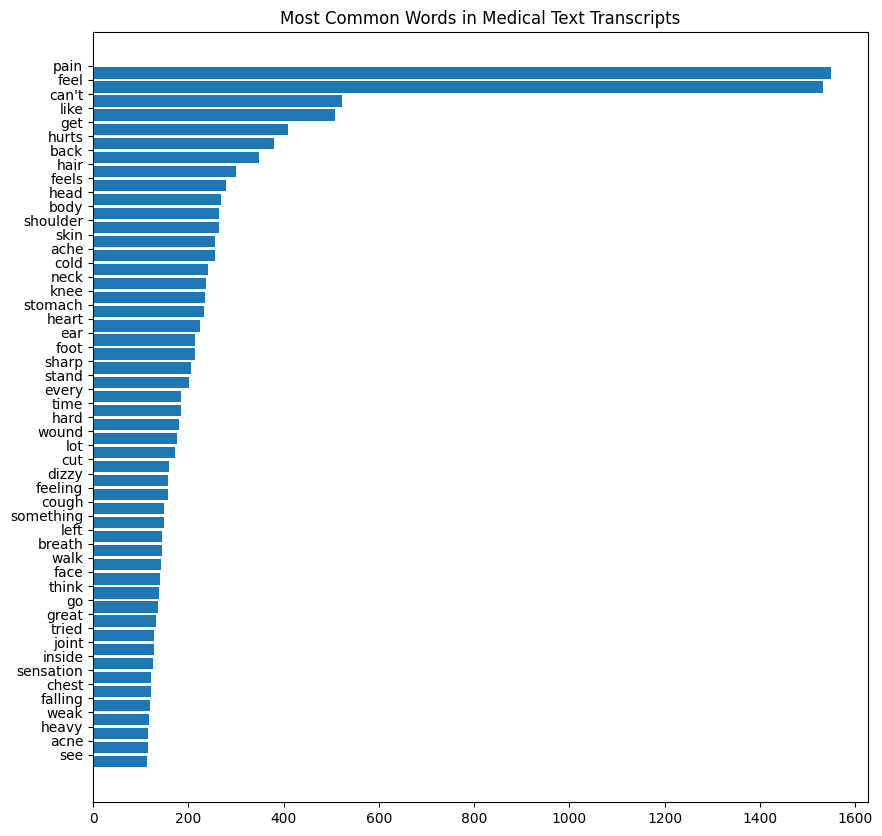

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import IPython
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

from nltk.corpus import stopwords
!pip install transformers
# %%
df = pd.read_csv("/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/overview-of-recordings.csv")
# %%
df.head(n=2)
# %%
df['audio_clipping'].unique()
# %%
df['audio_clipping:confidence'].describe()
# %%
df['audio_clipping:confidence'].unique()
# %%
df[df['audio_clipping:confidence'] == 0.653]
# %%
import os
import IPython.display

# Assuming 'test' is a directory containing audio files,
# list all files within it and select the first audio file
audio_files = [f for f in os.listdir('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test') if f.endswith(('.wav', '.mp3'))]  # Adjust file extensions as needed
if audio_files:
    audio_file_path = os.path.join('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test', audio_files[0])
    IPython.display.Audio(audio_file_path)  # Display the first audio file found
else:
    print("No audio files found in the directory.")
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_15629457.wav')
# %%
df[df['audio_clipping:confidence'] == df['audio_clipping:confidence'].min()]
# %%
df['phrase'][63]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_19948105.wav')
# %%
df['background_noise_audible'].unique()
# %%
df['background_noise_audible:confidence'].describe()
# %%
df[df['background_noise_audible:confidence'] == df['background_noise_audible:confidence'].min()]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_36985247.wav')
# %%
df['background_noise_audible:confidence'].unique()
# %%
df[df['background_noise_audible:confidence'] == 0.5148]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_63309891.wav')
# %%
df['overall_quality_of_the_audio'].describe()
# %%
df[df['overall_quality_of_the_audio'] == df['overall_quality_of_the_audio'].min()]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_95082870.wav')
# %%
df['phrase'][5]
# %%
df[df['overall_quality_of_the_audio'] == df['overall_quality_of_the_audio'].max()]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_14353703_23465450.wav')
# %%
df['quiet_speaker'].unique()
# %%
df[df['quiet_speaker'] == 'quiet_speaker']
# %%
len(df[df['quiet_speaker'] == 'quiet_speaker'])
# %%
df['quiet_speaker:confidence'].describe()
# %%
df[df['quiet_speaker:confidence'] == df['quiet_speaker:confidence'].min()]
# %%
IPython.display.Audio('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings/test/1249120_14353703_73504522.wav')

# %%
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()
# %%
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'phrase',"Most Common Words in Medical Text Transcripts")

In [ ]:
df["Words Per phrase"] = df['phrase'].str.split().apply(len)

In [ ]:
max(df["Words Per phrase"])

30

<Axes: xlabel='count', ylabel='prompt'>

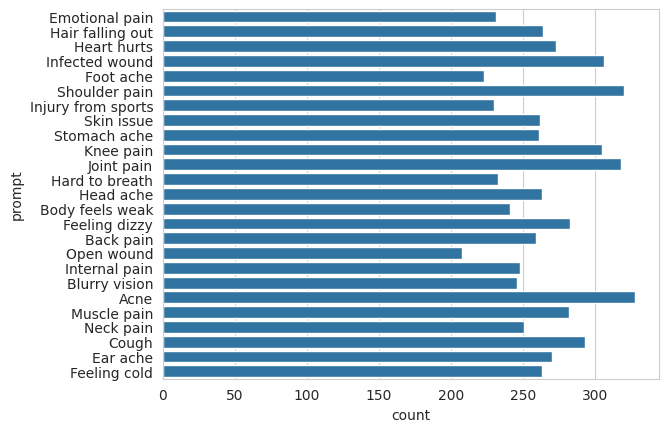

In [ ]:
sns.set_style("whitegrid")
promptsPlot = sns.countplot(y='prompt',data=df)
promptsPlot


In [ ]:
import os
rootpath = '/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings'

In [ ]:
len(os.listdir(os.path.join(rootpath,'train')))

381

In [ ]:
data_split = {'train': [], 'validate' : [], 'test': []}
subset_lst = os.listdir(rootpath)
for subset in subset_lst:
    for file_name in os.listdir(os.path.join(rootpath,subset)):
        data_split[subset].append(file_name)
    print(f'number of {subset} set:',len(data_split[subset]))
# test for train

number of train set: 381
number of test set: 5895
number of validate set: 385


In [ ]:
text = 'Tokenization of text is a core task of NLP.'

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") #distilbert-base-uncased
tokenizer

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
print('Encoded text')
# encoded_text = tokenizer.encode(text,return_tensors="pt") #pytorch format
encoded_text = tokenizer.encode(text)  #list

print(encoded_text,'\n')

print('Tokens')
tokens = tokenizer.convert_ids_to_tokens(encoded_text)
print(tokens,'\n')

print('Convert tokens to string')
print(tokenizer.convert_tokens_to_string(tokens),'\n')

Encoded text
[101, 19204, 3989, 1997, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102] 

Tokens
['[CLS]', 'token', '##ization', 'of', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]'] 

Convert tokens to string
[CLS] tokenization of text is a core task of nlp. [SEP] 



In [ ]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ex_model = AutoModel.from_pretrained(model_ckpt).to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
maxlen = max(df["Words Per phrase"])
# tokenizer.enable_truncation(max_length=maxlen)
# tokenizer.enable_padding(max_length=maxlen)


ex_inputs = tokenizer.encode_plus(
    text,
    None,
    add_special_tokens = True,
    max_length= maxlen,
    padding="max_length",
    truncation=True,
    return_tensors = 'pt',
    return_attention_mask = True)
# encoded_text = tokenizer(text,return_tensors="pt") #pytorch format

ex_inputs = {k:v.to(device) for k,v in ex_inputs.items()}

with torch.no_grad():
    outputs = ex_model(**ex_inputs)

print(outputs.last_hidden_state.size())

torch.Size([1, 30, 768])


In [ ]:
a = df["phrase"][:3].tolist()

inputs = tokenizer.batch_encode_plus(
    a,
    add_special_tokens = True,
    max_length= 30,
    padding="max_length",
    truncation=True,
    return_tensors = 'pt',
    return_attention_mask = True)
# encoded_text = tokenizer(text,return_tensors="pt") #pytorch format

inputs = {k:v.to(device) for k,v in inputs.items()}

print(inputs['input_ids'].shape)
with torch.no_grad():
    outputs = ex_model(**inputs)

print(outputs.last_hidden_state.size())

torch.Size([3, 30])
torch.Size([3, 30, 768])


In [ ]:
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel

class DATA():
    def __init__(self,mode = 'test', data_type = 'text'):
        assert data_type in ['text','audio']
        super().__init__()
        self.rootpath = '/kaggle/input/medical-speech-transcription-and-intent/Medical Speech, Transcription, and Intent/recordings'
        self.mode = mode
        self.data_type = data_type
        self.maxlen = 30

        self.data_split = {'train': [], 'validate' : [], 'test': []}
        subset_lst = os.listdir(self.rootpath)
        for subset in subset_lst:
            for file_name in os.listdir(os.path.join(self.rootpath,subset)):
                self.data_split[subset].append(file_name)
#             print(f'number of {subset} set:',len(data_split[subset]))

        self.df = pd.read_csv('../input/medical-speech-transcription-and-intent/medical speech transcription and intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')

        # preprocess
        self.df, remove_filenames = self.preprocess()
        self.df = self.df.reset_index(drop=True)
        self.data_split['test'] = list(set(self.data_split['test'])-set(remove_filenames))
        #label convert
        prompt = sorted(self.df['prompt'].unique())
        self.cls_cvt = {}

        for i in range(len(prompt)):
            self.cls_cvt[prompt[i]] = i

        print(self.cls_cvt)

        self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") #distilbert-base-uncased

    def preprocess(self): #remove rows have 'quiet_speaker', only for 'test' subset

        if self.mode == 'test':

            remove_df = self.df[self.df['quiet_speaker']=='quiet_speaker']
            remove_filenames = remove_df['file_name'].tolist()
            df = self.df[~(self.df['quiet_speaker']=='quiet_speaker')]
            return df, remove_filenames
        return self.df, []

    def get_subset(self):
        assert self.mode in ['train','validate','test']

        if self.mode == 'train':
            subset =  self.data_split['train']
        if self.mode == 'validate':
            subset = self.data_split['validate']
        if self.mode == 'test':
            subset = self.data_split['test']

        df = self.df[self.df['file_name'].isin(subset)]
        df = df.reset_index(drop=True)
        return df

    def __getitem__(self, index):
        df = self.get_subset()
        if self.data_type == 'text':
            datas = df['phrase']
        elif self.data_type == 'audio':
            datas = df['file_name']

        labels = df['prompt'].map(self.cls_cvt)
        if self.data_type == 'text':
            inputs = self.tokenizer.encode_plus(
            datas[index],
            None,
            add_special_tokens = True,
            max_length= self.maxlen,
            padding="max_length",
            truncation=True,
            return_tensors = 'pt',
            return_attention_mask = True)
        # encoded_text = tokenizer(text,return_tensors="pt") #pytorch format


            return inputs, labels[index]
        elif self.data_type == 'audio':
            pass
    def __len__(self):
        subset = self.get_subset()
        return len(subset)

In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    """ Very simple multi-layer perceptron (also called FFN)"""

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        self.num_layers = num_layers
        h = [hidden_dim] * (num_layers - 1)
        self.layers = nn.ModuleList(nn.Linear(n, k) for n, k in zip([input_dim] + h, h + [output_dim]))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = F.relu(layer(x)) if i < self.num_layers - 1 else layer(x)
        return x

class Textclassifier(nn.Module):
    def __init__(self,num_class = 25 ):
        super().__init__()

        model_ckpt = "distilbert-base-uncased"
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.Embedder = AutoModel.from_pretrained(model_ckpt)
        self.mlp = MLP(self.Embedder.config.dim,256,25,3)
    def forward(self, inputs):

        inputs = {k:v.squeeze(1) for k,v in inputs.items()}

        out_embed = self.Embedder(**inputs).last_hidden_state
        bs,_,dim = out_embed.shape

        logits = self.mlp(out_embed)[:,0,:].view(bs,-1)

        return logits

In [ ]:
import os
import tqdm

import torch
import numpy as np
import torch.nn as nn

# from lib.helpers.save_helper import get_checkpoint_state
# # from lib.helpers.save_helper import load_checkpoint
# from lib.helpers.save_helper import save_checkpoint

def get_checkpoint_state(model=None, optimizer=None, epoch=None, best_result=None, best_epoch=None):
    optim_state = optimizer.state_dict() if optimizer is not None else None
    if model is not None:
        if isinstance(model, torch.nn.DataParallel):
            model_state = model_state_to_cpu(model.module.state_dict())
        else:
            model_state = model.state_dict()
    else:
        model_state = None

    return {'epoch': epoch, 'model_state': model_state, 'optimizer_state': optim_state, 'best_result': best_result, 'best_epoch': best_epoch}

def save_checkpoint(state, filename):
    filename = '{}.pth'.format(filename)
    torch.save(state, filename)


class Trainer(object):
    def __init__(self,
                 max_epoch,
                 model,
                 optimizer,
                 train_loader,
                 test_loader,
                 lr_scheduler,
                 warmup_lr_scheduler,
                 logger,
                 loss,
                 tester):

        self.max_epoch = max_epoch
        self.model = model
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr_scheduler = lr_scheduler
        self.warmup_lr_scheduler = warmup_lr_scheduler
        self.logger = logger
        self.epoch = 0
        self.best_result = 0
        self.best_epoch = 0
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.loss = loss

        self.output_dir = './'
        self.tester = tester

        self.model = self.model.to(self.device)


    def train(self):
        start_epoch = self.epoch


#         progress_bar = tqdm.tqdm(range(start_epoch, self.max_epoch), dynamic_ncols=True, leave=True, desc='epochs')
        best_result = self.best_result
        best_epoch = self.best_epoch

        train_loss = []
        val_out = []

        for epoch in range(start_epoch, self.max_epoch):
            # reset random seed
            # ref: https://github.com/pytorch/pytorch/issues/5059
#             np.random.seed(np.random.get_state()[1][0] + epoch)
            # train one epoch
            train_loss.append(self.train_one_epoch(epoch))

            self.epoch += 1

            # update learning rate


            # save trained model
            if (self.epoch % 1) == 0:
                os.makedirs(self.output_dir, exist_ok=True)

                ckpt_name = os.path.join(self.output_dir, 'checkpoint')

                save_checkpoint(
                    get_checkpoint_state(self.model, self.optimizer, self.epoch, best_result, best_epoch),
                    ckpt_name)

                if self.tester is not None:

                    self.logger.info("Test Epoch {}".format(self.epoch))
                    val_out.append(self.tester.val_one_epoch())
                    cur_result = val_out[-1]['f1_score']
                    print("Current result:",val_out[-1])
                    if cur_result > best_result:
                        best_result = cur_result
                        best_epoch = self.epoch
                        ckpt_name = os.path.join(self.output_dir, 'checkpoint_best')
                        save_checkpoint(
                            get_checkpoint_state(self.model, self.optimizer, self.epoch, best_result, best_epoch),
                            ckpt_name)
                    self.logger.info("Best Result:{}, epoch:{}".format(best_result, best_epoch))
                    print("Best Result:{}, epoch:{}".format(best_result, best_epoch))

            if self.warmup_lr_scheduler is not None and epoch < 5:
                self.warmup_lr_scheduler.step()
            else:
                self.lr_scheduler.step(val_out[-1]['val_loss'])

#             progress_bar.update()

        self.logger.info("Best Result:{}, epoch:{}".format(best_result, best_epoch))

        return train_loss, val_out

    def train_one_epoch(self, epoch):
        torch.set_grad_enabled(True)
        self.model.train()
        print(">>>>>>> Epoch:", str(epoch) + ":")

#         progress_bar = tqdm.tqdm(total=len(self.train_loader), leave=(self.epoch+1 == self.max_epoch), desc='iters')
        total_loss = 0
        for batch_idx, (inputs, targets) in enumerate(self.train_loader):
#             inputs = inputs.to(self.device)
            inputs = {k:v.to(self.device) for k,v in inputs.items()}

            targets = targets.to(self.device)

            #freeze embedder model
            for param in self.model.Embedder.parameters():
                param.requires_grad = False

            ###
            # train one batch
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
#             print('aaaa',outputs.shape)
#             print(targets.shape)

            #ipdb.set_trace()
            losses = self.loss(outputs, targets)

            losses.backward()
            self.optimizer.step()

#             progress_bar.update()

            total_loss += losses.item() * inputs['input_ids'].size(0)

        total_loss /= len(self.train_loader.dataset)
#         progress_bar.close()
        print("Train loss:",total_loss)
        return total_loss

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def calculate_overlap_metrics(gt, pred,eps=1e-5):
    output = pred.view(-1, )
    target = gt.view(-1, ).float()

    tp = torch.sum(output * target)  # TP
    fp = torch.sum(output * (1 - target))  # FP
    fn = torch.sum((1 - output) * target)  # FN
    tn = torch.sum((1 - output) * (1 - target))  # TN

    pixel_acc = (tp + tn + eps) / (tp + tn + fp + fn + eps)
    dice = (2 * tp + eps) / (2 * tp + fp + fn + eps)
    iou = ( tp + eps) / ( tp + fp + fn + eps)
    precision = (tp + eps) / (tp + fp + eps)
    recall = (tp + eps) / (tp + fn + eps)
#     specificity = (tn + eps) / (tn + fp + eps)

    return pixel_acc, dice,iou, precision, recall

class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count




class Tester(object):
    def __init__(self,
                 model,
                 test_loader,
                 loss,
                test = False):
        self.test_loader = test_loader
        self.test = test
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model
        self.loss = loss
        self.model = self.model.to(self.device)

    def val_one_epoch(self):

        torch.set_grad_enabled(False)
        self.model.eval()

        results = {}
#         progress_bar = tqdm.tqdm(total=len(self.test_loader), leave=True, desc='Evaluation Progress')

#         pixel_acc_mask_meter= AverageMeter()
#         dice_mask_meter= AverageMeter()
#         iou_mask_meter= AverageMeter()
#         precision_mask_meter= AverageMeter()
#         recall_mask_meter= AverageMeter()


        precision_classification_meter = AverageMeter()
        recall_classification_meter = AverageMeter()
        f1_score_classification_meter = AverageMeter()
        accuracy_score_classification_meter = AverageMeter()

        logit_lst = []
        target_lst = []

        if not self.test:
            total_loss = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(self.test_loader):
                inputs = {k:v.to(self.device) for k,v in inputs.items()}
                targets = targets.to(self.device)



                ###
                # train one batch

                outputs = self.model(inputs)

#                 del y
                gc.collect()
                torch.cuda.empty_cache()

                #ipdb.set_trace()
                if not self.test:
                    losses = self.loss(outputs, targets)



                logits = outputs

                logits = logits.argmax(1)
                logits = logits.detach().cpu().numpy()

#                 targets = F.one_hot(torch.tensor(clss), num_classes=3)
                targets = targets.detach().cpu().numpy()
#                 masks = masks.argmax(1)
                logit_lst.append(logits)
                target_lst.append(targets)

#                 pixel_acc_mask, dice_mask,iou_mask, precision_mask, recall_mask = calculate_overlap_metrics(masks, decoder_outs,eps=1e-5)

                precision_classification = precision_score(targets,logits,average='macro')
                recall_classification = recall_score(targets,logits,average='macro')
                f1_score_classification = f1_score(targets,logits,average='macro')
                accuracy_score_classification = accuracy_score(targets,logits)


#                 pixel_acc_mask_meter.update(pixel_acc_mask,inputs.shape[0])
#                 dice_mask_meter.update(dice_mask.shape[0])
#                 iou_mask_meter.update(iou_mask,inputs.shape[0])
#                 precision_mask_meter.update(precision_mask,inputs.shape[0])
#                 recall_mask_meter.update(recall_mask,inputs.shape[0])

#                 precision_classification_meter.update(precision_classification,inputs.shape[0])
#                 recall_classification_meter.update(recall_classification,inputs.shape[0])
                f1_score_classification_meter.update(f1_score_classification,inputs['input_ids'].shape[0])
                accuracy_score_classification_meter.update(accuracy_score_classification,inputs['input_ids'].shape[0])

                precision_classification_meter.update(precision_classification,inputs['input_ids'].shape[0])
                recall_classification_meter.update(recall_classification,inputs['input_ids'].shape[0])


#                 progress_bar.update()
                if not self.test:
                    total_loss += losses.item() * inputs['input_ids'].size(0)

                del inputs
                del outputs
        if not self.test:
            total_loss /= len(self.test_loader.dataset)
#         progress_bar.close()

#         self.logger.info('==> Saving ...')
        out = {}

        if not self.test:
            out['val_loss'] = total_loss

        out['accuracy'] = accuracy_score_classification_meter.avg
        out['precision'] = precision_classification_meter.avg
        out['f1_score'] = f1_score_classification_meter.avg
        out['recall'] = recall_classification_meter.avg
        if self.test:
            out['logits'] = logit_lst
            out['targets'] = target_lst


        return out

In [ ]:
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
import os
import pandas as pd

class DATA():
    def __init__(self,mode = 'test', data_type = 'text'):
        assert data_type in ['text','audio']
        super().__init__()
        # Updated rootpath to the actual location of your dataset
        self.rootpath = '/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/recordings'
        self.mode = mode
        self.data_type = data_type
        self.maxlen = 30

        self.data_split = {'train': [], 'validate' : [], 'test': []}
        subset_lst = os.listdir(self.rootpath)
        for subset in subset_lst:
            for file_name in os.listdir(os.path.join(self.rootpath,subset)):
                self.data_split[subset].append(file_name)
#             print(f'number of {subset} set:',len(data_split[subset]))

        # Updated path to the actual location of your CSV file
        self.df = pd.read_csv('/content/drive/MyDrive/archive/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')

        # preprocess
        self.df, remove_filenames = self.preprocess()
        self.df = self.df.reset_index(drop=True)
        self.data_split['test'] = list(set(self.data_split['test'])-set(remove_filenames))
        #label convert
        prompt = sorted(self.df['prompt'].unique())
        self.cls_cvt = {}

        for i in range(len(prompt)):
            self.cls_cvt[prompt[i]] = i

        print(self.cls_cvt)

        self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") #distilbert-base-uncased

    def preprocess(self): #remove rows have 'quiet_speaker', only for 'test' subset

        if self.mode == 'test':

            remove_df = self.df[self.df['quiet_speaker']=='quiet_speaker']
            remove_filenames = remove_df['file_name'].tolist()
            df = self.df[~(self.df['quiet_speaker']=='quiet_speaker')]
            return df, remove_filenames
        return self.df, []

    def get_subset(self):
        assert self.mode in ['train','validate','test']

        if self.mode == 'train':
            subset =  self.data_split['train']
        if self.mode == 'validate':
            subset = self.data_split['validate']
        if self.mode == 'test':
            subset = self.data_split['test']

        df = self.df[self.df['file_name'].isin(subset)]
        df = df.reset_index(drop=True)
        return df

    def __getitem__(self, index):
        df = self.get_subset()
        if self.data_type == 'text':
            datas = df['phrase']
        elif self.data_type == 'audio':
            datas = df['file_name']

        labels = df['prompt'].map(self.cls_cvt)
        if self.data_type == 'text':
            inputs = self.tokenizer.encode_plus(
            datas[index],
            None,
            add_special_tokens = True,
            max_length= self.maxlen,
            padding="max_length",
            truncation=True,
            return_tensors = 'pt',
            return_attention_mask = True)
        # encoded_text = tokenizer(text,return_tensors="pt") #pytorch format


            return inputs, labels[index]
        elif self.data_type == 'audio':
            pass
    def __len__(self):
        subset = self.get_subset()
        return len(subset)

import torch
import torch.nn as nn
import torch.nn.functional as F # Import F for relu

class MLP(nn.Module):
    """ Very simple multi-layer perceptron (also called FFN)"""

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        self.num_layers = num_layers
        h = [hidden_dim] * (num_layers - 1)
        self.layers = nn.ModuleList(nn.Linear(n, k) for n, k in zip([input_dim] + h, h + [output_dim]))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = F.relu(layer(x)) if i < self.num_layers - 1 else layer(x)
        return x

class Textclassifier(nn.Module):
    def __init__(self,num_class = 25 ):
        super().__init__()

        model_ckpt = "distilbert-base-uncased"
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.Embedder = AutoModel.from_pretrained(model_ckpt)
        self.mlp = MLP(self.Embedder.config.hidden_size, 256, 25, 3) # Use hidden_size
    def forward(self, inputs):

        inputs = {k:v.squeeze(1) for k,v in inputs.items()}

        out_embed = self.Embedder(**inputs).last_hidden_state
        bs,_,dim = out_embed.shape

        logits = self.mlp(out_embed)[:,0,:].view(bs,-1)

        return logits

import os
import tqdm

import torch
import numpy as np
import torch.nn as nn

# from lib.helpers.save_helper import get_checkpoint_state
# # from lib.helpers.save_helper import load_checkpoint
# from lib.helpers.save_helper import save_checkpoint

def get_checkpoint_state(model=None, optimizer=None, epoch=None, best_result=None, best_epoch=None):
    optim_state = optimizer.state_dict() if optimizer is not None else None
    if model is not None:
        if isinstance(model, torch.nn.DataParallel):
            # Assuming model_state_to_cpu is defined elsewhere
            # If not, you'll need to define it or remove this condition
            model_state = model_state_to_cpu(model.module.state_dict())
        else:
            model_state = model.state_dict()
    else:
        model_state = None

    return {'epoch': epoch, 'model_state': model_state, 'optimizer_state': optim_state, 'best_result': best_result, 'best_epoch': best_epoch}

def save_checkpoint(state, filename):
    filename = '{}.pth'.format(filename)
    torch.save(state, filename)


class Trainer(object):
    def __init__(self,
                 max_epoch,
                 model,
                 optimizer,
                 train_loader,
                 test_loader,
                 lr_scheduler,
                 warmup_lr_scheduler,
                 logger, # Assuming logger is defined/imported elsewhere
                 loss,
                 tester):

        self.max_epoch = max_epoch
        self.model = model
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr_scheduler = lr_scheduler
        self.warmup_lr_scheduler = warmup_lr_scheduler
        self.logger = logger
        self.epoch = 0
        self.best_result = 0
        self.best_epoch = 0
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.loss = loss

        self.output_dir = './'
        self.tester = tester

        self.model = self.model.to(self.device)


    def train(self):
        start_epoch = self.epoch


#         progress_bar = tqdm.tqdm(range(start_epoch, self.max_epoch), dynamic_ncols=True, leave=True, desc='epochs')
        best_result = self.best_result
        best_epoch = self.best_epoch

        train_loss = []
        val_out = []

        for epoch in range(start_epoch, self.max_epoch):
            # reset random seed
            # ref: https://github.com/pytorch/pytorch/issues/5059
#             np.random.seed(np.random.get_state()[1][0] + epoch)
            # train one epoch
            train_loss.append(self.train_one_epoch(epoch))

            self.epoch += 1

            # update learning rate


            # save trained model
            if (self.epoch % 1) == 0:
                os.makedirs(self.output_dir, exist_ok=True)

                ckpt_name = os.path.join(self.output_dir, 'checkpoint')

                save_checkpoint(
                    get_checkpoint_state(self.model, self.optimizer, self.epoch, best_result, best_epoch),
                    ckpt_name)

                if self.tester is not None:

                    self.logger.info("Test Epoch {}".format(self.epoch))
                    val_out.append(self.tester.val_one_epoch())
                    cur_result = val_out[-1]['f1_score']
                    print("Current result:",val_out[-1])
                    if cur_result > best_result:
                        best_result = cur_result
                        best_epoch = self.epoch
                        ckpt_name = os.path.join(self.output_dir, 'checkpoint_best')
                        save_checkpoint(
                            get_checkpoint_state(self.model, self.optimizer, self.epoch, best_result, best_epoch),
                            ckpt_name)
                    self.logger.info("Best Result:{}, epoch:{}".format(best_result, best_epoch))
                    print("Best Result:{}, epoch:{}".format(best_result, best_epoch))

            if self.warmup_lr_scheduler is not None and epoch < 5:
                self.warmup_lr_scheduler.step()
            else:
                self.lr_scheduler.step(val_out[-1]['val_loss'])

#             progress_bar.update()

        self.logger.info("Best Result:{}, epoch:{}".format(best_result, best_epoch))

        return train_loss, val_out

    def train_one_epoch(self, epoch):
        torch.set_grad_enabled(True)
        self.model.train()
        print(">>>>>>> Epoch:", str(epoch) + ":")

#         progress_bar = tqdm.tqdm(total=len(self.train_loader), leave=(self.epoch+1 == self.max_epoch), desc='iters')
        total_loss = 0
        for batch_idx, (inputs, targets) in enumerate(self.train_loader):
#             inputs = inputs.to(self.device)
            inputs = {k:v.to(self.device) for k,v in inputs.items()}

            targets = targets.to(self.device)

            #freeze embedder model
            for param in self.model.Embedder.parameters():
                param.requires_grad = False

            ###
            # train one batch
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
#             print('aaaa',outputs.shape)
#             print(targets.shape)

            #ipdb.set_trace()
            losses = self.loss(outputs, targets)

            losses.backward()
            self.optimizer.step()

#             progress_bar.update()

            total_loss += losses.item() * inputs['input_ids'].size(0)

        total_loss /= len(self.train_loader.dataset)
#         progress_bar.close()
        print("Train loss:",total_loss)
        return total_loss

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import torch
import gc

def calculate_overlap_metrics(gt, pred,eps=1e-5):
    output = pred.view(-1, )
    target = gt.view(-1, ).float()

    tp = torch.sum(output * target)  # TP
    fp = torch.sum(output * (1 - target))  # FP
    fn = torch.sum((1 - output) * target)  # FN
    tn = torch.sum((1 - output) * (1 - target))  # TN

    pixel_acc = (tp + tn + eps) / (tp + tn + fp + fn + eps)
    dice = (2 * tp + eps) / (2 * tp + fp + fn + eps)
    iou = ( tp + eps) / ( tp + fp + fn + eps)
    precision = (tp + eps) / (tp + fp + eps)
    recall = (tp + eps) / (tp + fn + eps)
#     specificity = (tn + eps) / (tn + fp + eps)

    return pixel_acc, dice,iou, precision, recall

class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count




class Tester(object):
    def __init__(self,
                 model,
                 test_loader,
                 loss,
                test = False):
        self.test_loader = test_loader
        self.test = test
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model
        self.loss = loss
        self.model = self.model.to(self.device)

    def val_one_epoch(self):

        torch.set_grad_enabled(False)
        self.model.eval()

        results = {}
#         progress_bar = tqdm.tqdm(total=len(self.test_loader), leave=True, desc='Evaluation Progress')

#         pixel_acc_mask_meter= AverageMeter()
#         dice_mask_meter= AverageMeter()
#         iou_mask_meter= AverageMeter()
#         precision_mask_meter= AverageMeter()
#         recall_mask_meter= AverageMeter()


        precision_classification_meter = AverageMeter()
        recall_classification_meter = AverageMeter()
        f1_score_classification_meter = AverageMeter()
        accuracy_score_classification_meter = AverageMeter()

        logit_lst = []
        target_lst = []

        if not self.test:
            total_loss = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(self.test_loader):
                inputs = {k:v.to(self.device) for k,v in inputs.items()}
                targets = targets.to(self.device)



                ###
                # train one batch

                outputs = self.model(inputs)

#                 del y
                gc.collect()
                torch.cuda.empty_cache()

                #ipdb.set_trace()
                if not self.test:
                    losses = self.loss(outputs, targets)



                logits = outputs

                logits = logits.argmax(1)
                logits = logits.detach().cpu().numpy()

#                 targets = F.one_hot(torch.tensor(clss), num_classes=3)
                targets = targets.detach().cpu().numpy()
#                 masks = masks.argmax(1)
                logit_lst.append(logits)
                target_lst.append(targets)

#                 pixel_acc_mask, dice_mask,iou_mask, precision_mask, recall_mask = calculate_overlap_metrics(masks, decoder_outs,eps=1e-5)

                precision_classification = precision_score(targets,logits,average='macro')
                recall_classification = recall_score(targets,logits,average='macro')
                f1_score_classification = f1_score(targets,logits,average='macro')
                accuracy_score_classification = accuracy_score(targets,logits)


#                 pixel_acc_mask_meter.update(pixel_acc_mask,inputs.shape[0])
#                 dice_mask_meter.update(dice_mask.shape[0])
#                 iou_mask_meter.update(iou_mask,inputs.shape[0])
#                 precision_mask_meter.update(precision_mask,inputs.shape[0])
#                 recall_mask_meter.update(recall_mask,inputs.shape[0])

#                 precision_classification_meter.update(precision_classification,inputs.shape[0])
#                 recall_classification_meter.update(recall_classification,inputs.shape[0])
                f1_score_classification_meter.update(f1_score_classification,inputs['input_ids'].shape[0])
                accuracy_score_classification_meter.update(accuracy_score_classification,inputs['input_ids'].shape[0])

                precision_classification_meter.update(precision_classification,inputs['input_ids'].shape[0])
                recall_classification_meter.update(recall_classification,inputs['input_ids'].shape[0])


#                 progress_bar.update()
                if not self.test:
                    total_loss += losses.item() * inputs['input_ids'].size(0)

                del inputs
                del outputs
        if not self.test:
            total_loss /= len(self.test_loader.dataset)
#         progress_bar.close()

#         self.logger.info('==> Saving ...')
        out = {}

        if not self.test:
            out['val_loss'] = total_loss

        out['accuracy'] = accuracy_score_classification_meter.avg
        out['precision'] = precision_classification_meter.avg
        out['f1_score'] = f1_score_classification_meter.avg
        out['recall'] = recall_classification_meter.avg
        if self.test:
            out['logits'] = logit_lst
            out['targets'] = target_lst


        return out

#main
import warnings
warnings.filterwarnings("ignore")

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

train_data = DATA(mode = 'test', data_type = 'text')
train_loader = DataLoader(train_data, batch_size=8, shuffle=True, num_workers=2)

val_data = DATA(mode = 'validate', data_type = 'text')
val_loader = DataLoader(val_data, batch_size=1, shuffle=False, num_workers=2)

# test_data = BUSI('/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT',mode = 'test', k= 0)
# test_loader = DataLoader(test_data, batch_size=128, shuffle=False, num_workers=2)



model = Textclassifier()
import logging
import torch.optim as optim


optimizer = optim.AdamW(model.parameters(),lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')

loss = nn.CrossEntropyLoss()

epochs = 5

# Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')

# Creating an object
logger = logging.getLogger()

val_er = Tester(model,val_loader,loss)
trainer = Trainer(epochs,model,optimizer,train_loader,val_loader, scheduler,None,logger, loss, val_er)

gc.collect()
torch.cuda.empty_cache()
train_loss, val_out = trainer.train()

{'Acne': 0, 'Back pain': 1, 'Blurry vision': 2, 'Body feels weak': 3, 'Cough': 4, 'Ear ache': 5, 'Emotional pain': 6, 'Feeling cold': 7, 'Feeling dizzy': 8, 'Foot ache': 9, 'Hair falling out': 10, 'Hard to breath': 11, 'Head ache': 12, 'Heart hurts': 13, 'Infected wound': 14, 'Injury from sports': 15, 'Internal pain': 16, 'Joint pain': 17, 'Knee pain': 18, 'Muscle pain': 19, 'Neck pain': 20, 'Open wound': 21, 'Shoulder pain': 22, 'Skin issue': 23, 'Stomach ache': 24}
{'Acne': 0, 'Back pain': 1, 'Blurry vision': 2, 'Body feels weak': 3, 'Cough': 4, 'Ear ache': 5, 'Emotional pain': 6, 'Feeling cold': 7, 'Feeling dizzy': 8, 'Foot ache': 9, 'Hair falling out': 10, 'Hard to breath': 11, 'Head ache': 12, 'Heart hurts': 13, 'Infected wound': 14, 'Injury from sports': 15, 'Internal pain': 16, 'Joint pain': 17, 'Knee pain': 18, 'Muscle pain': 19, 'Neck pain': 20, 'Open wound': 21, 'Shoulder pain': 22, 'Skin issue': 23, 'Stomach ache': 24}
>>>>>>> Epoch: 0:
Train loss: 2.1226768222436516
Current

In [ ]:
def load_checkpoint(model, optimizer, filename, map_location):
    # Check if the file exists before trying to load it
    if os.path.isfile(filename):
        print("==> Loading from checkpoint '{}'".format(filename))
        checkpoint = torch.load(filename, map_location)
        epoch = checkpoint.get('epoch', -1)
        best_result = checkpoint.get('best_result', 0.0)
        best_epoch = checkpoint.get('best_epoch', 0.0)
        if model is not None and checkpoint['model_state'] is not None:
            model.load_state_dict(checkpoint['model_state'])
        if optimizer is not None and checkpoint['optimizer_state'] is not None:
            optimizer.load_state_dict(checkpoint['optimizer_state'])
    else:
        # Print a more informative message if file is not found
        raise FileNotFoundError(f"Checkpoint file not found at: {filename}")

    return model,epoch, best_result, best_epoch



test_data = DATA(mode = 'train', data_type = 'text')
test_loader = DataLoader(val_data, batch_size=1, shuffle=False, num_workers=2)

tester = Tester(model,test_loader,loss,test = True)

# Example: If checkpoint is in './checkpoint_best.pth'
model, _,_,_ = load_checkpoint(model=model,
                optimizer=None,
                # If you saved your checkpoint in current directory you can modify it to this:
                filename='./checkpoint_best.pth',
                map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

test_out = tester.val_one_epoch()



for key in ['accuracy','precision','recall','f1_score']:
    print(key,test_out[key])

{'Acne': 0, 'Back pain': 1, 'Blurry vision': 2, 'Body feels weak': 3, 'Cough': 4, 'Ear ache': 5, 'Emotional pain': 6, 'Feeling cold': 7, 'Feeling dizzy': 8, 'Foot ache': 9, 'Hair falling out': 10, 'Hard to breath': 11, 'Head ache': 12, 'Heart hurts': 13, 'Infected wound': 14, 'Injury from sports': 15, 'Internal pain': 16, 'Joint pain': 17, 'Knee pain': 18, 'Muscle pain': 19, 'Neck pain': 20, 'Open wound': 21, 'Shoulder pain': 22, 'Skin issue': 23, 'Stomach ache': 24}
==> Loading from checkpoint './checkpoint_best.pth'
accuracy 0.9506493506493506
precision 0.9506493506493506
recall 0.9506493506493506
f1_score 0.9506493506493506


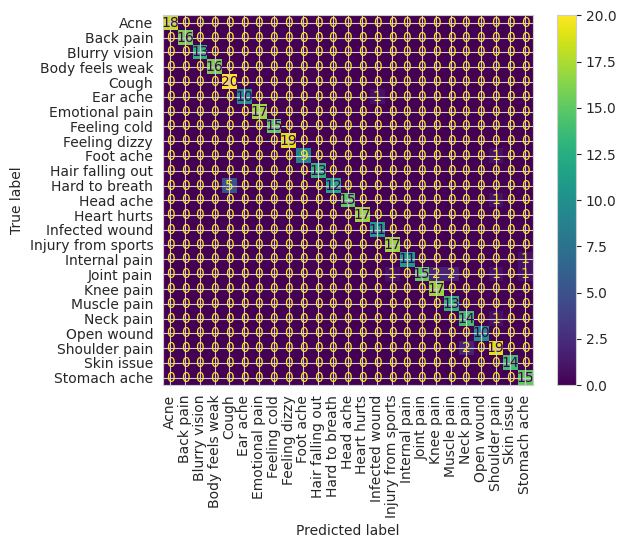

In [ ]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
prompt = {'Acne': 0, 'Back pain': 1, 'Blurry vision': 2, 'Body feels weak': 3, 'Cough': 4, 'Ear ache': 5, 'Emotional pain': 6, 'Feeling cold': 7, 'Feeling dizzy': 8, 'Foot ache': 9, 'Hair falling out': 10, 'Hard to breath': 11, 'Head ache': 12, 'Heart hurts': 13, 'Infected wound': 14, 'Injury from sports': 15, 'Internal pain': 16, 'Joint pain': 17, 'Knee pain': 18, 'Muscle pain': 19, 'Neck pain': 20, 'Open wound': 21, 'Shoulder pain': 22, 'Skin issue': 23, 'Stomach ache': 24}
labels = list(prompt.keys())
cm = sklearn.metrics.confusion_matrix(test_out['targets'],test_out['logits'])

disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(xticks_rotation="vertical")